## Packages

In [1]:
'''
#UNCOMMENT AND RUN THESE TO INSTALL ANY MISSING PACKAGES
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6
!brew install proj geos
!pip3 install --upgrade pyshp
# shapely needs to be built from source to link to geos. If it is already
# installed, uninstall it by: pip3 uninstall shapely
!pip install --no-binary shapely shapely --force
!apt-get install libproj-dev proj-data proj-bin  
!apt-get install libgeos-dev 
!pip install cython
!sudo pip install cartopy
'''

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     | 133.1 MB 1.2 MB/s
     |████████████████████████████████| 6.6 MB 24.1 MB/s 
     |████████████████████████████████| 219 kB 52.8 MB/s 
     |████████████████████████████████| 2.8 MB 26.0 MB/s 
/bin/bash: brew: command not found
     |████████████████████████████████| 383 kB 32.2 MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1
    

In [2]:
from netCDF4 import Dataset as NetCDFFile # extract the nc4 file to get geography data
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import os, sys
import numpy
# sys.maxsize
numpy.set_printoptions(threshold=100)
 
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib import animation
 
#search for specific base file: find `conda info --base` -name epsg
os.environ["PROJ_LIB"] ='/opt/anaconda3/pkgs/proj4-5.2.0-h0a44026_1/share/proj/'
from mpl_toolkits.basemap import Basemap #ploting the US map; install by `conda install -c anaconda basemap`

# Drawing in Lambert Conformal Projection

In [3]:
geography_file = NetCDFFile("GRACEDADM_CLSM0125US_7D.A20210628.030.nc4")
 
lat_us = geography_file.variables['lat'][:]; lon_us = geography_file.variables['lon'][:]
lon_us, lat_us = np.meshgrid(lon_us, lat_us); time_us = geography_file.variables['time'][:]
gws_inst = geography_file.variables['gws_inst'][:] # Groundwater Percentile
rtzsm_inst = geography_file.variables["rtzsm_inst"][:] # Root Zone Soil Moisture Percentile
sfsm_inst = geography_file.variables["sfsm_inst"][:] #Surface Soil Moisture Percentile

gws_filled_data_us = gws_inst.filled(fill_value=np.nan)
rtzsm_filled_data_us = rtzsm_inst.filled(fill_value=np.nan)
sfsm_filled_data_us = sfsm_inst.filled(fill_value=np.nan)

In [4]:
#drawing in the borders with projection llc
#fig = plt.figure(figsize=(2.5, 2))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_0=33, lon_0=-95)
#map.drawcoastlines(); map.drawstates(); map.drawcountries(); 
#map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
 
#drawing with shades
#map.drawcounties() # you can even add counties (and other shapefiles!)
#fig = plt.figure(figsize=(2.5, 2))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_0=33,lon_0=-95)
#map.shadedrelief(scale=0.5)

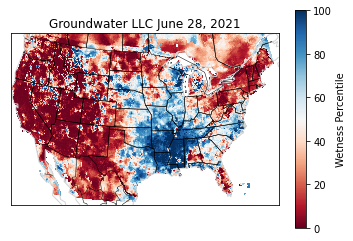

In [5]:
#plotting groundwater
map.pcolormesh(lon_us, lat_us, gws_filled_data_us[0], latlon=True, vmin=0.0,vmax=0.5, cmap= 'RdBu');
#map.pcolormesh(lon, lat, rtzsm_filled_data[0], latlon=True, vmin=0.0,vmax=0.5, cmap= 'RdBu');
#map.pcolormesh(lon, lat, sfsm_filled_data[0], latlon=True, vmin=0.0,vmax=0.5, cmap= 'RdBu');
 
plt.clim(0, 100); map.drawcoastlines(color='lightgray'); map.drawstates(); map.drawcountries(); 
plt.title('Groundwater LLC June 28, 2021'); plt.colorbar(label='Wetness Percentile')

# Drawing Global Projection

In [6]:
global_file = NetCDFFile("GRACEDADM_CLSM025_GL_7D.A20210628.020.nc4")
 
lat_glo = global_file.variables['lat'][:]; lon_glo = global_file.variables['lon'][:]
lon_glo, lat_glo = np.meshgrid(lon_glo, lat_glo); time_glo = global_file.variables['time'][:]
gws_inst = global_file.variables['gws_inst'][:] # Groundwater Percentile
rtzsm_inst = global_file.variables["rtzsm_inst"][:] # Root Zone Soil Moisture Percentile
sfsm_inst = global_file.variables["sfsm_inst"][:] #Surface Soil Moisture Percentile
 
gws_filled_data_glo = gws_inst.filled(fill_value=np.nan)
rtzsm_filled_data_glo = rtzsm_inst.filled(fill_value=np.nan)
sfsm_filled_data_glo = sfsm_inst.filled(fill_value=np.nan)

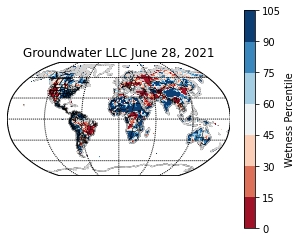

In [7]:
fig = plt.figure(figsize=(5, 4))
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
 
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
 
plt.title("Robinson Projection")
#plotting groundwater
'''
color_theme=[(52/235, 235/235, 86/235), (52/235, 70/235, 235/235), 
(165/235, 52/235, 235/235)]           
df.plot(color=color_theme)
'''         

m.contourf(lon_glo, lat_glo, gws_filled_data_glo[0], latlon=True, vmin=0.0,vmax=100, cmap = 'RdBu');
plt.clim(0, 100); m.drawcoastlines(color='lightgray'); m.drawstates(); m.drawcountries(); 
plt.title('Groundwater LLC June 28, 2021'); plt.colorbar(label='Wetness Percentile')

# 3d surface plot

"\ndef init():\n  # Plot the surface.\n  surf = ax.plot_surface(X, Y, input, cmap=cm.RdBu, linewidth=0, antialiased=False, vmin = 0, vmax = 100) \n \n  return fig,\n \ndef animate(i):\n  # azimuth angle : 0 deg to 360 deg\n  ax.view_init(elev=70, azim=i*4)\n  return fig,\n \n# Animate\nani = animation.FuncAnimation(fig, animate, init_func=init,\n                               frames=90, interval=50, blit=True)\nfn = 'rotate_azimuth_angle_3d_surf'\n#ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)\n#ani.save(fn+'.gif',writer='pillow',fps=1000/50)\nimport subprocess\ncmd = 'magick convert %s.gif -fuzz 5%% -layers Optimize %s_r.gif'%(fn,fn)\n#subprocess.check_output(cmd)\nplt.rcParams['animation.html'] = 'html5'\nani\n"

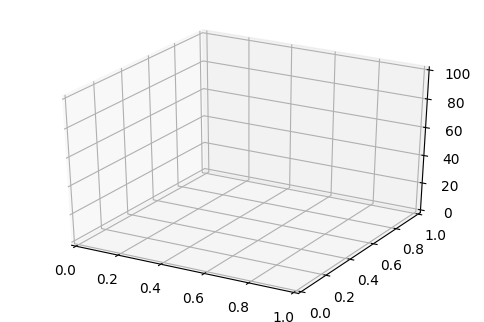

In [8]:
# Global Data
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100)
 
#X = lon; 360 * 4
#Y = lat; 150 * 4
X = np.arange(-180, 180, .25)
Y = np.arange(-60, 90, .25)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(0.1*X)
#print(Z.shape)
#a_file = open("sfsm.txt", "w"); text = sfsm_filled_data[0]; print(text, file=a_file); a_file.close()
 
input = rtzsm_filled_data_glo[0]
 
'''
for i in range(600):
    for j in range(1440):
        if(input[i][j] > 50):
            input[i][j] = np.nan
'''
 
# Customize the z axis.
ax.set_zlim(0, 100)
#fig.colorbar(surf, shrink=.5, aspect=5)
 
#ax.view_init(elev=-0, azim=-30)
 
'''
def init():
  # Plot the surface.
  surf = ax.plot_surface(X, Y, input, cmap=cm.RdBu, linewidth=0, antialiased=False, vmin = 0, vmax = 100) 
 
  return fig,
 
def animate(i):
  # azimuth angle : 0 deg to 360 deg
  ax.view_init(elev=70, azim=i*4)
  return fig,
 
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)
fn = 'rotate_azimuth_angle_3d_surf'
#ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)
#ani.save(fn+'.gif',writer='pillow',fps=1000/50)
import subprocess
cmd = 'magick convert %s.gif -fuzz 5%% -layers Optimize %s_r.gif'%(fn,fn)
#subprocess.check_output(cmd)
plt.rcParams['animation.html'] = 'html5'
ani
'''

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: Z contains NaN values. This may result in rendering artifacts.


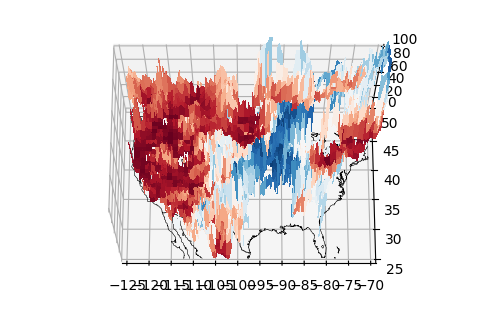

In [9]:
 
# CONUS Data
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=100)
#extent = [-180, 180, -90, 90]; lon : lat
extent = [-125, -70, 25, 50] # 55 : 25
 
# Create a basemap instance that draws the Earth layer
bm = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[2],
             urcrnrlon=extent[1], urcrnrlat=extent[3],
             projection='cyl', resolution='l', fix_aspect=False, ax=ax)
# Add Basemap to the figure
ax.add_collection3d(bm.drawcoastlines(linewidth=0.25))
ax.add_collection3d(bm.drawcountries(linewidth=0.35))
 
# Add meridian and parallel gridlines
lon_step = 5
lat_step = 5
meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
ax.set_yticks(parallels)
ax.set_xticks(meridians)
 
#X = lon; 464/4 = 116 / 2 = 58
#Y = lat; 224/4 = 56 / 2 = 28
X = np.arange(-125, -67, .125)
Y = np.arange(25, 53, .125)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(0.1*X)
#print(Z.shape)
#a_file = open("sfsm.txt", "w"); text = sfsm_filled_data[0]; print(text, file=a_file); a_file.close()
 
input = rtzsm_filled_data_us[0]
 
'''
for i in range(600):
    for j in range(1440):
        if(input[i][j] > 50):
            input[i][j] = np.nan
'''
 
#surf = ax.plot_surface(X, Y, input, cmap=cm.RdBu, linewidth=0, antialiased=False, vmin = 0, vmax = 100) 
# Customize the z axis.
ax.set_zlim(0, 100)
#fig.colorbar(surf, shrink=.5, aspect=5)
 
#ax.view_init(elev= 70, azim=-90)
 
 
def init():
  # Plot the surface.
  surf = ax.plot_surface(X, Y, input, cmap=cm.RdBu, linewidth=0, antialiased=False, vmin = 0, vmax = 100) 
 
  return fig,
 
def animate(i):
  # azimuth angle : 0 deg to 360 deg
  ax.view_init(elev=70, azim=i*4-86)
  return fig,
 
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)
fn = 'rotate_azimuth_angle_3d_surf'
#ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)
#ani.save(fn+'.gif',writer='pillow',fps=1000/50)
import subprocess
cmd = 'magick convert %s.gif -fuzz 5%% -layers Optimize %s_r.gif'%(fn,fn)
#subprocess.check_output(cmd)
plt.rcParams['animation.html'] = 'html5'
ani

In [10]:
'''
# California Subsection
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) 
#X = lon
#Y = lat
#x = x[360:400, 224:320]
#y = y[360:400, 224:320]

X = np.arange(-180, 180, .25)
Y = np.arange(-60, 90, .25)
X, Y = np.meshgrid(X, Y)

input = rtzsm_filled_data_glo[0]
for i in range(600):
    for j in range(1440):
        if(input[i][j] > 50):
            input[i][j] = np.nan

subinput = input[360:400, 224:320]
#print(subinput)
print(np.min(subinput))
print(np.max(subinput))
subx = X[360:400, 224:320]
suby = Y[360:400, 224:320]

surf = ax.plot_surface(subx, suby, subinput, cmap=cm.RdBu, linewidth=0, antialiased=False, vmin = 0, vmax = 100)
 
# Customize the z axis.
ax.set_zlim(0, 100)
 
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=.5, aspect=5)
 
ax.view_init(elev=20, azim=-90)
'''

'\n# California Subsection\nfig, ax = plt.subplots(subplot_kw={"projection": "3d"}) \n#X = lon\n#Y = lat\n#x = x[360:400, 224:320]\n#y = y[360:400, 224:320]\n\nX = np.arange(-180, 180, .25)\nY = np.arange(-60, 90, .25)\nX, Y = np.meshgrid(X, Y)\n\ninput = rtzsm_filled_data_glo[0]\nfor i in range(600):\n    for j in range(1440):\n        if(input[i][j] > 50):\n            input[i][j] = np.nan\n\nsubinput = input[360:400, 224:320]\n#print(subinput)\nprint(np.min(subinput))\nprint(np.max(subinput))\nsubx = X[360:400, 224:320]\nsuby = Y[360:400, 224:320]\n\nsurf = ax.plot_surface(subx, suby, subinput, cmap=cm.RdBu, linewidth=0, antialiased=False, vmin = 0, vmax = 100)\n \n# Customize the z axis.\nax.set_zlim(0, 100)\n \n# Add a color bar which maps values to colors.\nfig.colorbar(surf, shrink=.5, aspect=5)\n \nax.view_init(elev=20, azim=-90)\n'

In [11]:
'''
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
 
 
def init():
    # Plot the surface.
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    return fig,
 
def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,
 
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)
fn = 'rotate_azimuth_angle_3d_surf'
#ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)
#ani.save(fn+'.gif',writer='pillow',fps=1000/50)
import subprocess
cmd = 'magick convert %s.gif -fuzz 5%% -layers Optimize %s_r.gif'%(fn,fn)
#subprocess.check_output(cmd)
plt.rcParams['animation.html'] = 'html5'
ani
'''

'\nX = np.arange(-5, 5, 0.25)\nY = np.arange(-5, 5, 0.25)\nX, Y = np.meshgrid(X, Y)\nR = np.sqrt(X**2 + Y**2)\nZ = np.sin(R)\n \nfig, ax = plt.subplots(subplot_kw={"projection": "3d"})\n \n \ndef init():\n    # Plot the surface.\n    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=False)\n    return fig,\n \ndef animate(i):\n    # azimuth angle : 0 deg to 360 deg\n    ax.view_init(elev=10, azim=i*4)\n    return fig,\n \n# Animate\nani = animation.FuncAnimation(fig, animate, init_func=init,\n                               frames=90, interval=50, blit=True)\nfn = \'rotate_azimuth_angle_3d_surf\'\n#ani.save(fn+\'.mp4\',writer=\'ffmpeg\',fps=1000/50)\n#ani.save(fn+\'.gif\',writer=\'pillow\',fps=1000/50)\nimport subprocess\ncmd = \'magick convert %s.gif -fuzz 5%% -layers Optimize %s_r.gif\'%(fn,fn)\n#subprocess.check_output(cmd)\nplt.rcParams[\'animation.html\'] = \'html5\'\nani\n'